# Cryptocurrency Price Analysis Dataset Overview

We will overview and analyze the <a href="http://earthdatascience.org" target="_blank">Cryptocurrency Price</a> dataset to assess the investment potential by comparing returns and risk indicators over time based on the performance records of four cryptocurrencies.

## 0. Imports

In [1]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates

#Machine learning library
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

## Introducing the Cryptocurrency Price dataset - Exploratory Data Analysis (EDA)

### 1.  Analyze the dataset to understand its nature, quality, and properties: 

**a. Descriptive Statistics:** </br>
* Calculate basic statistics (mean, median, standard deviation) for each cryptocurrency:

In [2]:
cols = ["Date", "Crypto", "Open", "High", "Low", "Close"]

In [3]:
dtf_for_BTC = pd.read_csv("./Cryptocurrency Price Dataset/BTC.csv", usecols=cols)
dtf_for_BTC = dtf_for_BTC[cols]
dtf_for_BTC.head()

,Date,Crypto,Open,High,Low,Close
0,12/31/19,BTC,7254.0,7309.0,7132.0,7171.0
1,12/30/19,BTC,7402.0,7430.0,7217.0,7254.0
2,12/29/19,BTC,7334.0,7529.0,7295.0,7402.0
3,12/28/19,BTC,7235.0,7359.0,7235.0,7334.0
4,12/27/19,BTC,7208.0,7267.0,7087.0,7235.0


if the mean is substantially higher or lower than the median, it indicates that some values are pulling the mean away from the central tendency.</br> If the mean and median values are relatively close, it suggests a more symmetric distribution.

In [4]:
dtf_for_BTC.describe()

,Open,High,Low,Close
count,1974.000000,1974.000000,1974.000000,1974.000000
mean,20639.256839,21173.736069,20064.781662,20643.867275
std,16391.724861,16828.496642,15900.462608,16390.452205
min,3188.000000,3266.000000,3156.000000,3188.000000
25%,8010.000000,8213.750000,7748.000000,8007.750000
50%,11752.500000,12054.000000,11497.500000,11750.000000
75%,30955.250000,31873.750000,29689.000000,30983.250000
max,67802.000000,68925.000000,66112.000000,67802.000000


We can say comprehensively about all the columns in the Bitcoin dataset that:</br> The mean and median have a substantial difference which suggesting on potential outliers.</br> For further investigation we will use visualizations or statistical methods like Z-scores or IQR that could help identify and handle these extreme values.

In [5]:
dtf_for_ETH = pd.read_csv("./Cryptocurrency Price Dataset/ETH.csv", usecols=cols)
dtf_for_ETH = dtf_for_ETH[cols]
dtf_for_ETH.head()

,Date,Crypto,Open,High,Low,Close
0,12/31/21,ETH,3736.59,3812.67,3622.51,3687.67
1,12/30/21,ETH,3725.60,3768.63,3590.00,3733.98
2,12/29/21,ETH,3809.14,3827.01,3700.00,3724.98
3,12/28/21,ETH,4061.29,4075.97,3765.23,3807.82
4,12/27/21,ETH,4086.36,4128.28,4037.00,4061.30


In [6]:
dtf_for_ETH.describe()

,Open,High,Low,Close
count,1975.000000,1975.000000,1975.000000,1975.000000
mean,1187.961544,1226.940577,1144.599033,1188.435453
std,1164.574631,1200.438606,1123.993771,1164.606959
min,81.720000,84.150000,80.920000,81.720000
25%,215.730000,222.820000,207.525000,215.615000
50%,646.980000,669.000000,618.120000,647.000000
75%,1817.655000,1855.245000,1773.655000,1817.660000
max,4800.000000,4865.810000,4715.510000,4800.000000


For Ethereum dataset, it seems to have a wide distribution with some variability, but the mean and median differences are not extreme.

In [7]:
dtf_for_LTC = pd.read_csv("./Cryptocurrency Price Dataset/LTC.csv", usecols=cols)
dtf_for_LTC = dtf_for_LTC[cols]
dtf_for_LTC.head()

,Date,Crypto,Open,High,Low,Close
0,12/31/22,LTC,67.78,71.04,67.56,70.29
1,12/30/22,LTC,66.08,68.57,66.04,67.78
2,12/29/22,LTC,66.39,67.16,65.58,66.08
3,12/28/22,LTC,68.08,69.37,66.09,66.42
4,12/27/22,LTC,69.92,71.03,67.80,68.08


In [8]:
dtf_for_LTC.describe()

,Open,High,Low,Close
count,1975.000000,1975.000000,1975.000000,1975.000000
mean,98.426248,102.451261,94.191747,98.345600
std,58.750386,62.229616,55.228690,58.674749
min,22.660000,23.470000,22.260000,22.580000
25%,54.745000,56.390000,52.745000,54.765000
50%,78.410000,81.680000,75.600000,78.190000
75%,132.380000,137.100000,125.935000,132.130000
max,373.350000,413.220000,345.760000,373.640000


For Litecoin dataset, based on these observations, there are no apparent extreme values or outliers. </br> The distribution of prices appears to be centered, and there is not a significant difference between the mean and median. This suggests a relatively stable and consistent trend in the cryptocurrency's price over the provided time period.

In [9]:
dtf_for_XPR = pd.read_csv("./Cryptocurrency Price Dataset/XPR.csv", usecols=cols)
dtf_for_XPR = dtf_for_XPR[cols]
dtf_for_XPR.head()

,Date,Crypto,Open,High,Low,Close
0,12/31/22,XRP,0.34,0.34,0.34,0.34
1,12/30/22,XRP,0.34,0.35,0.33,0.34
2,12/29/22,XRP,0.36,0.36,0.34,0.34
3,12/28/22,XRP,0.37,0.37,0.35,0.36
4,12/27/22,XRP,0.37,0.37,0.36,0.37


In [10]:
dtf_for_XPR.describe()

,Open,High,Low,Close
count,1975.000000,1975.000000,1975.000000,1975.000000
mean,0.511838,0.533975,0.487266,0.510729
std,0.333890,0.358062,0.302996,0.330889
min,0.140000,0.150000,0.120000,0.140000
25%,0.290000,0.300000,0.280000,0.290000
50%,0.400000,0.410000,0.380000,0.400000
75%,0.630000,0.660000,0.600000,0.630000
max,2.780000,3.350000,2.550000,2.780000


For the Ripple dataset, it seems to be relatively tight distributions, but there may be some extreme values present, especially at the upper end (as indicated by the maximum values).

### 2. Sanitize and organize dataset:
**a. Handle Missing Data:**

* Check for missing values and decide on an appropriate strategy (imputation, removal, etc.).

Handling the missing values of each of the features by imputing them with the average value of the days that are the most closest to them.

In [11]:
dtf_names = ["Bitcoin (BTC)", "Ethereum (ETH)", "Litecoin (LTC)", "Ripple (XRP)"]
dtf_list_miss = [dtf_for_BTC, dtf_for_ETH, dtf_for_LTC, dtf_for_XPR]
dtf_list = []

# Function to impute missing values with the average of the day before and day after
def impute_missing_values(row):
    if pd.isnull(row['Close']):
        before_previous_day = dtf[(dtf['Crypto'] == row['Crypto']) & (dtf['Date'] == (row['Date'] - pd.DateOffset(2)))].squeeze()
        previous_day = dtf[(dtf['Crypto'] == row['Crypto']) & (dtf['Date'] == (row['Date'] - pd.DateOffset(1)))].squeeze()
        next_day = dtf[(dtf['Crypto'] == row['Crypto']) & (dtf['Date'] == (row['Date'] + pd.DateOffset(1)))].squeeze()
        after_next_day = dtf[(dtf['Crypto'] == row['Crypto']) & (dtf['Date'] == (row['Date'] + pd.DateOffset(2)))].squeeze()
        
        if not pd.isnull(previous_day['Close']) and not pd.isnull(next_day['Close']):
            row['Close'] = (previous_day['Close'] + next_day['Close']) / 2
            row['Open'] = (previous_day['Open'] + next_day['Open']) / 2
            row['High'] = (previous_day['High'] + next_day['High']) / 2
            row['Low'] = (previous_day['Low'] + next_day['Low']) / 2
        elif not pd.isnull(previous_day['Close']) and not pd.isnull(after_next_day['Close']):
            row['Close'] = (previous_day['Close'] + after_next_day['Close']) / 2
            row['Open'] = (previous_day['Open'] + after_next_day['Open']) / 2
            row['High'] = (previous_day['High'] + after_next_day['High']) / 2
            row['Low'] = (previous_day['Low'] + after_next_day['Low']) / 2
        elif not pd.isnull(before_previous_day['Close']) and not pd.isnull(next_day['Close']):
            row['Close'] = (before_previous_day['Close'] + next_day['Close']) / 2
            row['Open'] = (before_previous_day['Open'] + next_day['Open']) / 2
            row['High'] = (before_previous_day['High'] + next_day['High']) / 2
            row['Low'] = (before_previous_day['Low'] + next_day['Low']) / 2
        else:
            row['Close'] = (before_previous_day['Close'] + after_next_day['Close']) / 2
            row['Open'] = (before_previous_day['Open'] + after_next_day['Open']) / 2
            row['High'] = (before_previous_day['High'] + after_next_day['High']) / 2
            row['Low'] = (before_previous_day['Low'] + after_next_day['Low']) / 2

    return row

for (dtf, name) in zip(dtf_list_miss, dtf_names):
    # Convert 'Date' column to datetime format
    dtf['Date'] = pd.to_datetime(dtf['Date'], format='%m/%d/%y')
    
    # Sort the DataFrame by 'Date'
    dtf = dtf.sort_values(by=['Crypto', 'Date'])

    # Identify missing values
    missing_dates = dtf[dtf.isnull().any(axis=1)]['Date'].unique()

    # Apply the imputation function to fill missing values
    dtf_copy = dtf.copy()
    dtf_copy = dtf_copy.apply(impute_missing_values, axis=1)
    
    dtf_list.append(dtf_copy)

#     # Verify that missing values are filled
#     print(dtf_copy[dtf_copy.isnull().any(axis=1)])

    # Save the imputed dataset
    dtf.to_csv('imputed_dataset_'+name+'.csv', index=False)

### 3. Define a prediction problem:

after we examine the datasets, we will move forward and focus on our **target variable -** `close price`,</br> that represent the cryptocurrency's value at the end of the daily trading period.</br>
This indicator captures the market sentiment and consensus among traders and investors at the conclusion of each trading day. As a result, it plays a pivotal role in the comprehensive assessment of the overall performance and viability of a cryptocurrency as an investment opportunity.</br> 
With this variable we can:
1. Calculate Daily Returns:</br>As mentioned earlier, you can calculate the daily percentage change in the close price. This helps you understand the daily performance of the cryptocurrency and can be used to analyze volatility.</br>
2. Moving Averages:</br>Use moving averages (such as the simple moving average or exponential moving average) to smooth out price fluctuations and identify trends in the close price.
3. Relative Strength Index (RSI):</br>RSI is a momentum oscillator that measures the speed and change of price movements. It can help identify overbought or oversold conditions.

The **prediction problem** will be to assess the investment potential by comparing returns and risk indicators over time based on the performance records of the feature "Close" of those four cryptocurrencies.
This assessment of investment potential involves analysis according to the target variable.

* Examine the distribution of the target variable 'Close' price for each cryptocurrency to identify any outliers:

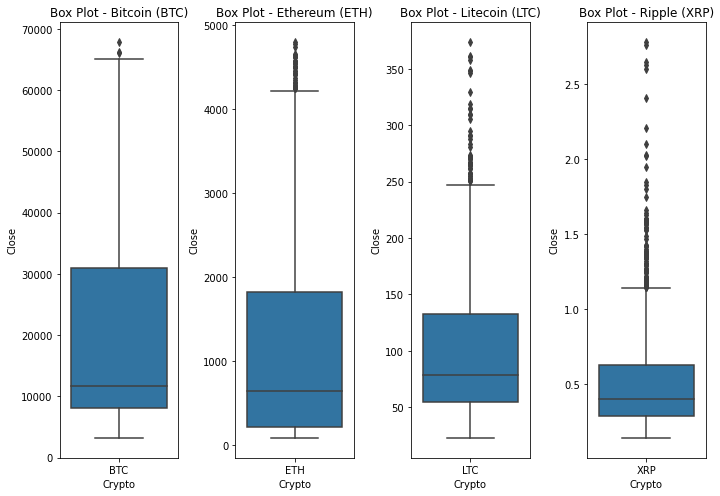

In [12]:
dtf_names = ["Bitcoin (BTC)", "Ethereum (ETH)", "Litecoin (LTC)", "Ripple (XRP)"]

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(dtf_list), figsize=(10, 7))

# Plot each box plot
for i, (dtf, name) in enumerate(zip(dtf_list, dtf_names)):
    sns.boxplot(x='Crypto', y='Close', data=dtf, ax=axes[i])
    axes[i].set_title(f'Box Plot - {name}')

plt.tight_layout()
plt.show()

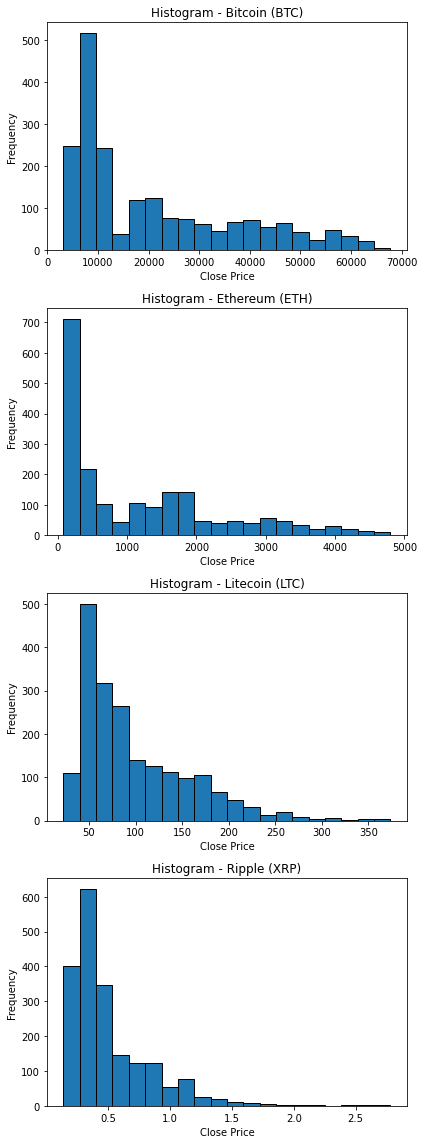

In [13]:
# Set up subplots
fig, axes = plt.subplots(nrows=len(dtf_list), ncols=1, figsize=(6, 4 * len(dtf_list)))

# Plot histograms for each DataFrame
for i, (dtf, name) in enumerate(zip(dtf_list, dtf_names)):
    axes[i].hist(dtf['Close'], bins=20, edgecolor='black')
    axes[i].set_title(f'Histogram - {name}')
    axes[i].set_xlabel('Close Price')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

we can see that according to the histograms that all crypto have Right Tail which indicate the presence of higher outliers or data points that are much larger than the majority. </br> 

**b. Build meaningful data visualizations and Time Series Analysis:**</br>
* Plot the daily closing prices for each cryptocurrency over the entire period.
* Examine trends, seasonality, and volatility.

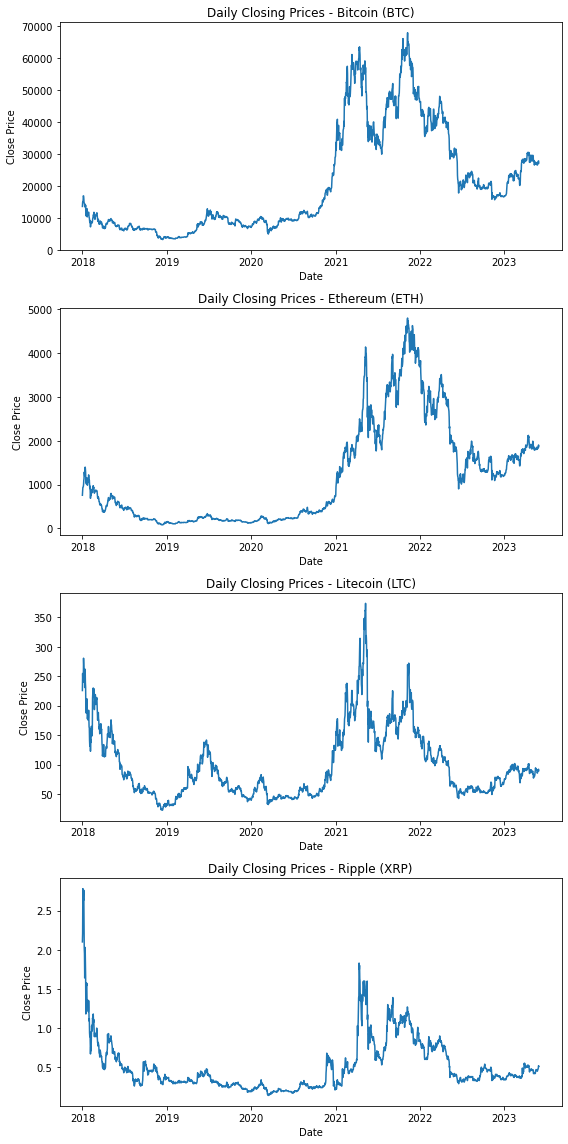

In [14]:
dtf_names = ["Bitcoin (BTC)", "Ethereum (ETH)", "Litecoin (LTC)", "Ripple (XRP)"]

# Convert 'Date' column to datetime format
for dtf in dtf_list:
    dtf['Date'] = pd.to_datetime(dtf['Date'], format='%m/%d/%y')

# Set up subplots
fig, axes = plt.subplots(nrows=len(dtf_list), ncols=1, figsize=(8, 4 * len(dtf_list)))  # Adjust figsize as needed

# Plot daily closing prices for each cryptocurrency
for i, (dtf, name) in enumerate(zip(dtf_list, dtf_names)):
    sns.lineplot(x=dtf['Date'], y=dtf['Close'], ax=axes[i])
    axes[i].set_title(f'Daily Closing Prices - {name}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Close Price')

plt.tight_layout()
plt.show()

In general, we can see that the value of Bitcoin and Ethereum has increased over the years and in contrast the values of Litecoin and Ripple are decreasing as time goes by.

We can see that in the first 3 years (between 2018 till 2021) thr volatility Bitcoin was low so we can infer that the trend was more stable and this could be interpreted as a period of relative market calm and more predictability.
We can also add that the risk in that time was much lower because it's value is stable for a long time.
After those years we can see that there is high jump and wider fluctuations which indicates higher volatility.

We can see that the behavior of Ethereum is very similar to the behavior of Bitcoin over those 5 years.

Regarding Litecoin we can see much more volatility - there are more ups and downs.
We can see that it started with a high value and through the years its value is even lower than where the samples started.

for Ripple we can see a similar behvior it started with a high value and ends with much lower value; But there are less fluctuations and it's volatility between the middle of 2018 till 2021 is much stable.

**c. Correlation Analysis:** </br>
* Calculate and visualize the correlation between the target feature - close price to the other features for each cryptocurrency:

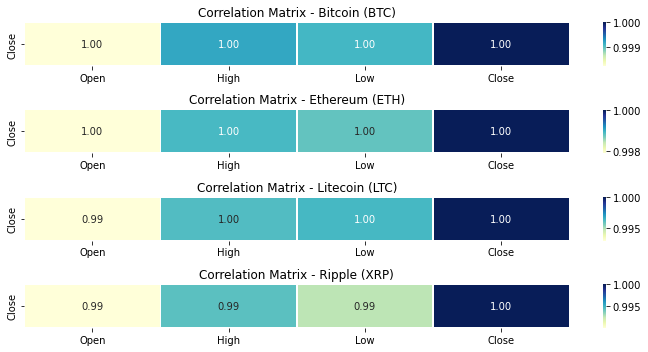

In [15]:
# Set up subplots
fig, axes = plt.subplots(nrows=len(dtf_list), ncols=1, figsize=(10, 5))  # 1 row, 4 columns

# Calculate and visualize correlation matrices for each cryptocurrency
for i, (dtf, name) in enumerate(zip(dtf_list, dtf_names)):
    correlation_matrix = dtf.corr(method="pearson").loc[["Close"]]
    
    # Create a heatmap for the correlation matrix
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, ax=axes[i])    
    
    axes[i].set_title(f'Correlation Matrix - {name}')

plt.tight_layout()
plt.show()


### 4. Benchmark Pipeline:
* **Build a Simple ML Pipeline:** 
    - By use XGBoost, creating a basic pipeline including data preprocessing, feature engineering, and model training.
* **Choose Evaluation Metrics:**
    * choose the Mean Absolute Error (MAE) as an appropriate metrics for regression.
* **Cross-Validation:**
    * Implement a 10-fold cross-validation process for evaluating model performance.

In [16]:
# Function to build and evaluate the ML pipeline
def build_and_evaluate_pipeline(df):
    # Specify features and target variable
    X = df[['Open', 'High', 'Low']]
    y = df['Close']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build a simple ML pipeline with XGBoost
    model = Pipeline([
        ('scaler', StandardScaler()),  # Data preprocessing
        ('regressor', XGBRegressor())  # XGBoost model
    ])

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model using Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error (MAE) on Test Set: {mae}')

    # Choose appropriate evaluation metrics
    # For regression problems, Mean Absolute Error (MAE) is commonly used

    # Implement a 10-fold cross-validation process
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')

    # Display cross-validation results
    print(f'Cross-Validation Mean Absolute Error (MAE): {-cv_scores.mean()}')


# Apply the pipeline to each DataFrame
for i, (dtf, name) in enumerate(zip(dtf_list, dtf_names)):
    print("Pipeline Evaluation for "+name+":")
    build_and_evaluate_pipeline(dtf_list[i])

Pipeline Evaluation for Bitcoin (BTC):
Mean Absolute Error (MAE) on Test Set: 354.35025526602055
Cross-Validation Mean Absolute Error (MAE): 327.23829920972696
Pipeline Evaluation for Ethereum (ETH):
Mean Absolute Error (MAE) on Test Set: 25.930292563909223
Cross-Validation Mean Absolute Error (MAE): 23.761896291401353
Pipeline Evaluation for Litecoin (LTC):
Mean Absolute Error (MAE) on Test Set: 2.0586905791850034
Cross-Validation Mean Absolute Error (MAE): 2.174005558848913
Pipeline Evaluation for Ripple (XRP):
Mean Absolute Error (MAE) on Test Set: 0.010777677324753774
Cross-Validation Mean Absolute Error (MAE): 0.012402800025433777


**Results summary:**
* Bitcoin (BTC):
    - Mean Absolute Error on Test Set: 354.3502
    - Cross-Validation Mean Absolute Error: 327.2382
* Ethereum (ETH):
    - Mean Absolute Error on Test Set: 25.9302
    - Cross-Validation Mean Absolute Error: 23.7618
* Litecoin (LTC):
    - Mean Absolute Error on Test Set: 2.0586
    - Cross-Validation Mean Absolute Error: 2.174
* Ripple (XRP):
    - Mean Absolute Error on Test Set: 0.0107
    - Cross-Validation Mean Absolute Error: 0.0124
    
The results give an indication of how well the XGBoost model is performing on predicting the closing prices for each cryptocurrency.</br>

The Mean Absolute Error is a metric that measures the average absolute difference between the predicted values and the actual values. It provides an indication of how well the model is performing in terms of accuracy.

The formula for MAE is:</br>

$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y}_{i}|$

where:
- $n$ is the number of observations.

- $y_i$ is the actual value.

- $\hat{y}_i$ is the predicted value.


In general terms:
- A lower MAE indicates that the model's predictions are, on average, closer to the actual values.
- A higher MAE suggests that there is more variability between the predicted and actual values, indicating lower accuracy.

So, we can infer that a lower Mean Absolute Error values, means that a smaller MAE is desirable as it indicates better predictive performance of the model on the given dataset.</br>

* **Results for Bitcoin (BTC):**
    * The relatively high MAE on the test set (354.3502) and in cross-validation (327.2382) may suggest that predicting Bitcoin prices using the given features is challenging. The model might not capture the complexities of Bitcoin price movements effectively.
* **Results for Ethereum (ETH):**
    * A lower MAE on the test set (25.9302) and in cross-validation (23.7618) indicates better performance compared to Bitcoin. The model seems to be more effective at predicting Ethereum prices with the provided features.
* **Results for Litecoin (LTC):**
    * An even lower MAE on the test set (2.0586) and in cross-validation (2.174) suggests that the model is performing well for Litecoin. The predictions are closer to the actual values, indicating a good fit.
* **Results for Ripple (XRP):**
    * The extremely low MAE on the test set (0.0107) and in cross-validation (0.0124) suggest that the model is highly accurate in predicting Ripple prices. However, it's essential to scrutinize such low values, as they might indicate potential overfitting.

***But is MAE is good enough for the prediction problem?***</br>
In the context of assessing investment potential based on cryptocurrency performance, using MAE has both advantages and limitations:

**Advantages:**
* Interpretability: MAE is easy to interpret as it represents the average absolute difference between predicted and actual values. This is important in financial analysis, where transparency and simplicity can be crucial.
* Robustness: MAE is less sensitive to outliers compared to other metrics like Mean Squared Error (MSE). In financial datasets, outliers can significantly impact the evaluation of model performance.

**Limitations:**
* Not Capturing Percentage Errors: MAE treats all errors equally, regardless of the magnitude of the actual values. In investment analysis, percentage errors might be more relevant, especially when dealing with different cryptocurrencies with varying price ranges.
* Doesn't Penalize Large Errors: MAE doesn't penalize large errors more heavily than small errors. In investment analysis, you might want to emphasize the importance of minimizing large prediction errors, as they could have a substantial impact on decision-making.

So, we would like to use some additional metrics that will capture the percentage errors or will focus on risk assessment like:
1. **Percentage MAE (PMAE):** Calculate the percentage difference between predicted and actual values and then compute the average absolute percentage error.
2. **Risk Metrics:** Explore additional risk metrics such as volatility, beta, or drawdown, which can provide insights into the risk associated with each cryptocurrency.

Here is an update for the `build_and_evaluate_pipeline` function:

In [17]:
# Function to build and evaluate the enhanced ML pipeline
def build_and_evaluate_enhanced_pipeline(df):
    # Specify features and target variable
    X = df[['Open', 'High', 'Low']]
    y = df['Close']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build a simple ML pipeline with XGBoost
    model = Pipeline([
        ('scaler', StandardScaler()),  # Data preprocessing
        ('regressor', XGBRegressor())  # XGBoost model
    ])

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model using Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error (MAE) on Test Set: {mae}')

    # Calculate Percentage MAE (PMAE)
    pmae = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    print(f'Percentage MAE (PMAE) on Test Set: {pmae}%')

    # appropriate evaluation metrics:
    # For example: for regression problems, Mean Absolute Error (MAE) is commonly used

    # Implement a 10-fold cross-validation process
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')

    # Display cross-validation results
    print(f'Cross-Validation Mean Absolute Error (MAE): {-cv_scores.mean()}')

    # Calculate Percentage MAE (PMAE) for cross-validation
    cv_pmae = np.mean(np.abs(cv_scores / y.mean())) * 100
    print(f'Cross-Validation Percentage MAE (PMAE): {cv_pmae}%')

    # Placeholder for risk metrics (customize based on your needs)
    # Example: Calculate volatility
    volatility = np.std(y_pred - y_test)
    print(f'Volatility on Test Set: {volatility}')

    # Placeholder for other risk metrics (beta, drawdown, etc.)

# Apply the enhanced pipeline to each DataFrame
for i, (dtf, name) in enumerate(zip(dtf_list, dtf_names)):
    print("Enhanced Pipeline Evaluation for "+name+":")
    build_and_evaluate_enhanced_pipeline(dtf_list[i])

Enhanced Pipeline Evaluation for Bitcoin (BTC):
Mean Absolute Error (MAE) on Test Set: 354.35025526602055
Percentage MAE (PMAE) on Test Set: 1.7207681687687122%
Cross-Validation Mean Absolute Error (MAE): 327.23829920972696
Cross-Validation Percentage MAE (PMAE): 1.5851598678550052%
Volatility on Test Set: 627.9096642111264
Enhanced Pipeline Evaluation for Ethereum (ETH):
Mean Absolute Error (MAE) on Test Set: 25.930292563909223
Percentage MAE (PMAE) on Test Set: 2.1927564812680806%
Cross-Validation Mean Absolute Error (MAE): 23.761896291401353
Cross-Validation Percentage MAE (PMAE): 1.99942674447555%
Volatility on Test Set: 50.5547943453196
Enhanced Pipeline Evaluation for Litecoin (LTC):
Mean Absolute Error (MAE) on Test Set: 2.0586905791850034
Percentage MAE (PMAE) on Test Set: 1.9177922243430359%
Cross-Validation Mean Absolute Error (MAE): 2.174005558848913
Cross-Validation Percentage MAE (PMAE): 2.210577350536184%
Volatility on Test Set: 3.8483920506288074
Enhanced Pipeline Evalua

Analysis on the additional results:
* MAE and PMAE: The MAE and PMAE values for all cryptocurrencies provide insights into the model's accuracy and percentage accuracy on the test set.
* Cross-Validation: Cross-validation results provide a more robust evaluation, demonstrating the model's generalization performance across different subsets of the data.
* Volatility: Volatility measures highlight the degree of variation in cryptocurrency prices. Lower volatility can indicate a more stable prediction.
* Comparison Across Cryptocurrencies: Comparing metrics across cryptocurrencies allows you to identify which cryptocurrencies are more accurately predicted and have lower volatility.
* Interpretation: Interpret the results in the context of your investment goals. Consider the trade-off between accuracy, percentage accuracy, and volatility for each cryptocurrency.

#### Bitcoin (BTC):
1. **MAE on Test Set: 354.35**
</br> The Mean Absolute Error (MAE) of 354.35 indicates the average absolute difference between the predicted and actual closing prices on the test set. In this context, it means that, on average, the model's predictions deviate by approximately 354.35 units from the actual values.
    
2. **PMAE on Test Set: 1.72%**
</br>The Percentage Mean Absolute Error (PMAE) of 1.72% represents the average absolute percentage difference between the predicted and actual closing prices on the test set. It implies that, on average, the model's predictions have a percentage error of 1.72%.
3. **Cross-Validation MAE: 327.24**
</br>The Cross-Validation MAE of 327.24 is the average MAE across 10 folds in the cross-validation process. It provides a more robust assessment of the model's generalization performance. This value is slightly lower than the MAE on the test set.
4. **Cross-Validation PMAE: 1.59%**
</br>The Cross-Validation PMAE of 1.59% is the average PMAE across 10 folds in the cross-validation process. It gives an average percentage error across different subsets of the data, indicating the model's consistency. This value is slightly lower than the PMAE on the test set.
5. **Volatility on Test Set: 627.91**
</br>The Volatility of 627.91 represents the degree of variation in Bitcoin prices on the test set. Higher volatility suggests larger price fluctuations.

#### Ethereum (ETH):
1. **MAE on Test Set: 25.93**
</br>The Mean Absolute Error (MAE) of 25.93 indicates the average absolute difference between the predicted and actual closing prices on the test set. It suggests that, on average, the model's predictions deviate by approximately 25.93 units from the actual values.
2. **PMAE on Test Set: 2.19%**
</br>The Percentage Mean Absolute Error (PMAE) of 2.19% represents the average absolute percentage difference between the predicted and actual closing prices on the test set. It implies that, on average, the model's predictions have a percentage error of 2.19%.
3. **Cross-Validation MAE: 23.76**
</br>The Cross-Validation MAE of 23.76 is the average MAE across 10 folds in the cross-validation process. It provides a more robust assessment of the model's generalization performance.
4. **Cross-Validation PMAE: 2.00%**
</br>The Cross-Validation PMAE of 2.00% is the average PMAE across 10 folds in the cross-validation process. It gives an average percentage error across different subsets of the data, indicating the model's consistency.
5. **Volatility on Test Set: 50.55**
</br>The Volatility of 50.55 represents the degree of variation in Ethereum prices on the test set. Higher volatility suggests larger price fluctuations.

#### Litecoin (LTC):
1. **MAE on Test Set: 2.06**
</br>The Mean Absolute Error (MAE) of 2.06 indicates the average absolute difference between the predicted and actual closing prices on the test set for Litecoin. It suggests that, on average, the model's predictions deviate by approximately 2.06 units from the actual values.
2. **PMAE on Test Set: 1.92%**
</br>The Percentage Mean Absolute Error (PMAE) of 1.92% represents the average absolute percentage difference between the predicted and actual closing prices on the test set for Litecoin. It implies that, on average, the model's predictions have a percentage error of 1.92%.
3. **Cross-Validation MAE: 2.17**
</br>The Cross-Validation MAE of 2.17 is the average MAE across 10 folds in the cross-validation process for Litecoin. It provides a more robust assessment of the model's generalization performance.
4. **Cross-Validation PMAE: 2.21%**
</br>The Cross-Validation PMAE of 2.21% is the average PMAE across 10 folds in the cross-validation process for Litecoin. It gives an average percentage error across different subsets of the data, indicating the model's consistency.
5. **Volatility on Test Set: 3.85**
</br>The Volatility of 3.85 represents the degree of variation in Litecoin prices on the test set. Higher volatility suggests larger price fluctuations.

#### Ripple (XRP):
1. **MAE on Test Set: 0.01**
</br>The Mean Absolute Error (MAE) of 0.01 indicates the average absolute difference between the predicted and actual closing prices on the test set for Ripple (XRP). It suggests that, on average, the model's predictions deviate by approximately 0.01 units from the actual values.
2. **PMAE on Test Set: 1.95%**
</br>The Percentage Mean Absolute Error (PMAE) of 1.95% represents the average absolute percentage difference between the predicted and actual closing prices on the test set for Ripple (XRP). It implies that, on average, the model's predictions have a percentage error of 1.95%.
3. **Cross-Validation MAE: 0.012**
</br>The Cross-Validation MAE of 0.012 is the average MAE across 10 folds in the cross-validation process. It provides a more robust assessment of the model's generalization performance for Ripple (XRP).
4. **Cross-Validation PMAE: 2.43%**
</br>The Cross-Validation PMAE of 2.43% is the average PMAE across 10 folds in the cross-validation process. It gives an average percentage error across different subsets of the data, indicating the model's consistency for Ripple (XRP).
5. **Volatility on Test Set: 0.019**
</br>The Volatility of 0.019 represents the degree of variation in Ripple (XRP) prices on the test set. Higher volatility suggests larger price fluctuations. 